#### When the distance of the bomber and the fighter is less than 900km and greater than 100km, it is assumed that the bomber is shot down or destroyed. Otherwise, the bomber escaped from sight

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [13]:
def calculate_distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

In [14]:
def update_fighter_position(xf, yf, xb, yb, vf):

    dist = calculate_distance(xf, yf, xb, yb)

    sinA, cosA = (yb - yf) / dist, (xb - xf) / dist
    xf, yf = xf + vf * cosA, yf + vf * sinA
    return xf, yf

In [15]:
def update_bomber_position():
    return np.random.randint(0, 1000, 2)

In [16]:
def simulate_pursuit(vf, thresholdDist, maxDist):
    xf, yf = np.random.randint(0, 1000, 2)
    xb, yb = np.random.randint(0, 1000, 2)

    fx, fy, bx, by = [xf], [yf], [xb], [yb]
    time = 0
    while True:
        time += 1

        dist = calculate_distance(xf, yf, xb, yb)
        print(f"time={time} xf={xf:.2f} yf={yf:.2f} xb={xb:.2f} yb={yb:.2f} distance={dist:.2f}")

        if dist >= maxDist:
            print(f'BOMBER ESCAPES FROM THE SIGHT OF FIGHTER at {time} seconds')
            break
        elif dist <= thresholdDist:
            print(f'BOMBER SHOT DOWN at {time} seconds')
            break
        else:
            xf, yf = update_fighter_position(xf, yf, xb, yb, vf)
            xb, yb = update_bomber_position()

            fx.append(xf)
            fy.append(yf)
            bx.append(xb)
            by.append(yb)

    return fx, fy, bx, by

In [17]:
# Define the parameters
vf_param = 20
thresholdDist_param = 100
maxDist_param = 900

In [19]:

# Call the function with parameters
fx, fy, bx, by = simulate_pursuit(vf_param, thresholdDist_param, maxDist_param)

time=1 xf=176.00 yf=760.00 xb=1.00 yb=533.00 distance=286.63
time=2 xf=163.79 yf=744.16 xb=871.00 yb=504.00 distance=746.88
time=3 xf=182.73 yf=737.73 xb=4.00 yb=820.00 distance=196.75
time=4 xf=164.56 yf=746.09 xb=495.00 yb=430.00 distance=457.28
time=5 xf=179.01 yf=732.27 xb=549.00 yb=461.00 distance=458.78
time=6 xf=195.14 yf=720.44 xb=911.00 yb=157.00 distance=911.00
BOMBER ESCAPES FROM THE SIGHT OF FIGHTER at 6 seconds


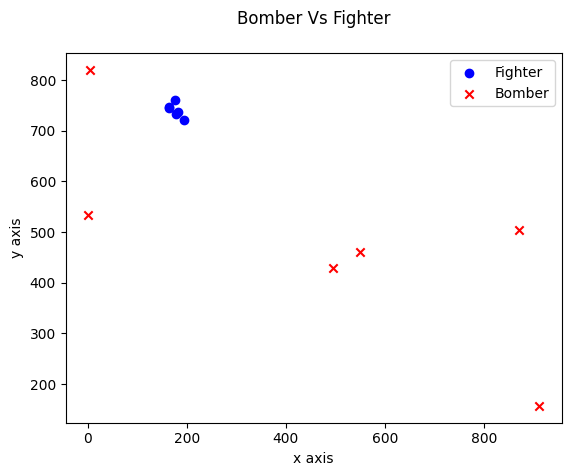

In [20]:
# Plot the path of the fighter and bomber
plt.scatter(fx, fy, c='blue', marker='o', label='Fighter')
plt.scatter(bx, by, c='red', marker='x', label='Bomber')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Bomber Vs Fighter\n')
plt.legend()
plt.show()
